In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
dfx = pd.read_csv("/Volumes/part3/LogisticRegressionDataset/logisticX.csv")
dfy = pd.read_csv("/Volumes/part3/LogisticRegressionDataset/logisticY.csv")

X = dfx.values
Y = dfy.values
A=X
B=Y
print(X.shape)
print(Y.shape)

(99, 2)
(99, 1)


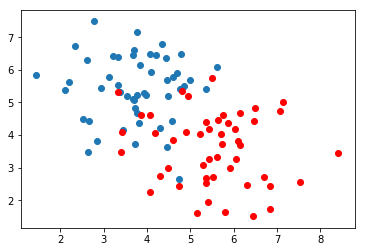

In [76]:
plt.scatter(X[:50,0],X[:50,1],label="Class 0")
plt.scatter(X[50:,0],X[50:,1],label="Class 1" , c="r")
plt.show()

##Logistic Regression

In [77]:
def hypothesis(x,theta):
    h = (theta*x).sum()
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def gradientDescent(x,y,theta,lr=0.5):
    err = getError(x,y,theta)
    #grad = getGrad()
    grad = batchGrad(x,y,theta)
    theta-=lr*grad
    
    return theta,err

def getError(x,y,theta):
    err=0.0
    
    m=x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],theta)
        if(y[i]==1 and hx!=0):
            err+=np.log2(hx)
        elif(y[i]==0 and hx!=1):
            err+=np.log2(1-hx)
    return -err/m

def batchGrad(x,y,theta,batchsize=10):
    grad = np.zeros(theta.shape)
    m=x.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batchsize]
    
    for i in indices:
        hx = hypothesis(x[i],theta)
        grad+=-(y[i]-hx)*x[i]
        
    return grad/m 



In [78]:
ones = np.ones((X.shape[0],1))
print(X.shape , ones.shape)
X = np.hstack((ones,X))
split = int(0.8*(X.shape[0]))

print(X.shape)




(99, 2) (99, 1)
(99, 3)


In [79]:
Xtrain = X[:split,:]
Ytrain = Y[:split,:]
Xtest = X[split:,:]
Ytest = Y[split:,:]

print(Xtrain.shape , Ytrain.shape , Xtest.shape , Ytest.shape)

(79, 3) (79, 1) (20, 3) (20, 1)


In [80]:
#try
a = np.array([[1,2],
              [3,4]])
b = np.ones((2,1))
print (a.shape , b.shape)

c =np.hstack((b,a))
print(c)

(2, 2) (2, 1)
[[1. 1. 2.]
 [1. 3. 4.]]


In [81]:
loss = []
accuracy = []

theta = np.zeros(Xtrain.shape[1])
print(theta)

[0. 0. 0.]


In [82]:
def getAccuracy(Xtest , Ytest , theta):
    Ypred = []
    
    for i in range(Xtest.shape[0]):
        pred = prediction(Xtest[i],theta)
        Ypred.append(pred)
        
    Ypred = np.array(Ypred).reshape(-1,1)
        
    return float((Ytest==Ypred).sum())/Xtest.shape[0]

def prediction(x,theta):
    prob = hypothesis(x,theta)
    if(prob<0.5):
        return 0
    else:
        return 1

for i in range(1000):
    theta , err = gradientDescent(Xtrain , Ytrain , theta)
    loss.append(err)
    accuracy.append(getAccuracy(Xtest , Ytest ,theta))
    


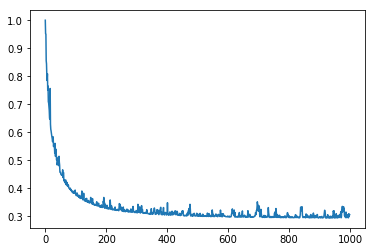

In [83]:
plt.plot(loss)

In [84]:
accuracy[-1]

0.9

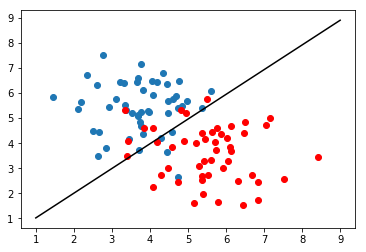

In [85]:
plt.scatter(A[:50,0],A[:50,1],label="Class 0")
plt.scatter(A[50:,0],A[50:,1],label="Class 1" , c="r")
x = np.linspace(1,9,50)
y = (-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y,c='k')
plt.show()